In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv("C:/Users/babak/Desktop/Fall 2021/DASM/HW2/data.csv")
data.index=data.index+1
data

i     xi
1    1  10.11
2    2   9.53
3    3  10.07
4    4  11.35
5    5   8.31
6    6   9.35
7    7   9.55
8    8   9.57
9    9  10.86
10  10   9.58
11  11   9.90
12  12   8.88
13  13   9.29
14  14   9.72
15  15  10.71
16  16  10.66
17  17  10.16
18  18   9.86
19  19  10.74
20  20   9.95
21  21  10.56
22  22  11.58
23  23  11.35
24  24   9.17
25  25  12.05
26  26  10.90
27  27  12.25
28  28  11.96
29  29  10.41
30  30   9.91

In [2]:
mu0=10
delta=1
K=0.5*delta*0.9
# as mu0=0 and sigma=1, no difference to use yi or xi (slide 20)
xn=[]
nx=[]
for j in data.i:
    xn.append(data.xi[j]-(mu0+K))
    nx.append((mu0-K)-data.xi[j])
data['xn']=xn
data['nx']=nx
data

i     xi    xn    nx
1    1  10.11 -0.34 -0.56
2    2   9.53 -0.92  0.02
3    3  10.07 -0.38 -0.52
4    4  11.35  0.90 -1.80
5    5   8.31 -2.14  1.24
6    6   9.35 -1.10  0.20
7    7   9.55 -0.90  0.00
8    8   9.57 -0.88 -0.02
9    9  10.86  0.41 -1.31
10  10   9.58 -0.87 -0.03
11  11   9.90 -0.55 -0.35
12  12   8.88 -1.57  0.67
13  13   9.29 -1.16  0.26
14  14   9.72 -0.73 -0.17
15  15  10.71  0.26 -1.16
16  16  10.66  0.21 -1.11
17  17  10.16 -0.29 -0.61
18  18   9.86 -0.59 -0.31
19  19  10.74  0.29 -1.19
20  20   9.95 -0.50 -0.40
21  21  10.56  0.11 -1.01
22  22  11.58  1.13 -2.03
23  23  11.35  0.90 -1.80
24  24   9.17 -1.28  0.38
25  25  12.05  1.60 -2.50
26  26  10.90  0.45 -1.35
27  27  12.25  1.80 -2.70
28  28  11.96  1.51 -2.41
29  29  10.41 -0.04 -0.86
30  30   9.91 -0.54 -0.36

In [3]:
cp = [max(0,data['xn'].values[0]+0)]
cn = [max(0,data['nx'].values[0]+0)]
print("first value of Ci+",cp ,'\n',"first value of Ci-", cn)

first value of Ci+ [0] 
 first value of Ci- [0]


In [4]:
for i,j in zip(data.i,data.xn[1:30]):
    cp.append(max(0, j+cp[i-1]))
data['ci+']=cp
for i,j in zip(data.i,data.nx[1:30]):
    cn.append(max(0, j+cn[i-1]))
cnn = [element * -1 for element in cn] #multiply it to -1 for plotting
data['ci-']=cnn
data

i     xi    xn    nx   ci+   ci-
1    1  10.11 -0.34 -0.56  0.00  0.00
2    2   9.53 -0.92  0.02  0.00 -0.02
3    3  10.07 -0.38 -0.52  0.00  0.00
4    4  11.35  0.90 -1.80  0.90  0.00
5    5   8.31 -2.14  1.24  0.00 -1.24
6    6   9.35 -1.10  0.20  0.00 -1.44
7    7   9.55 -0.90  0.00  0.00 -1.44
8    8   9.57 -0.88 -0.02  0.00 -1.42
9    9  10.86  0.41 -1.31  0.41 -0.11
10  10   9.58 -0.87 -0.03  0.00 -0.08
11  11   9.90 -0.55 -0.35  0.00  0.00
12  12   8.88 -1.57  0.67  0.00 -0.67
13  13   9.29 -1.16  0.26  0.00 -0.93
14  14   9.72 -0.73 -0.17  0.00 -0.76
15  15  10.71  0.26 -1.16  0.26  0.00
16  16  10.66  0.21 -1.11  0.47  0.00
17  17  10.16 -0.29 -0.61  0.18  0.00
18  18   9.86 -0.59 -0.31  0.00  0.00
19  19  10.74  0.29 -1.19  0.29  0.00
20  20   9.95 -0.50 -0.40  0.00  0.00
21  21  10.56  0.11 -1.01  0.11  0.00
22  22  11.58  1.13 -2.03  1.24  0.00
23  23  11.35  0.90 -1.80  2.14  0.00
24  24   9.17 -1.28  0.38  0.86 -0.38
25  25  12.05  1.60 -2.50  2.46  0.00
26  26  10.90  0.45 -1.35  2.91  0.00
27  27  12.25  1.80 -2.70  4.71  0.00
28  28  11.96  1.51 -2.41  6.22  0.00
29  29  10.41 -0.04 -0.86  6.18  0.00
30  30   9.91 -0.54 -0.36  5.64  0.00

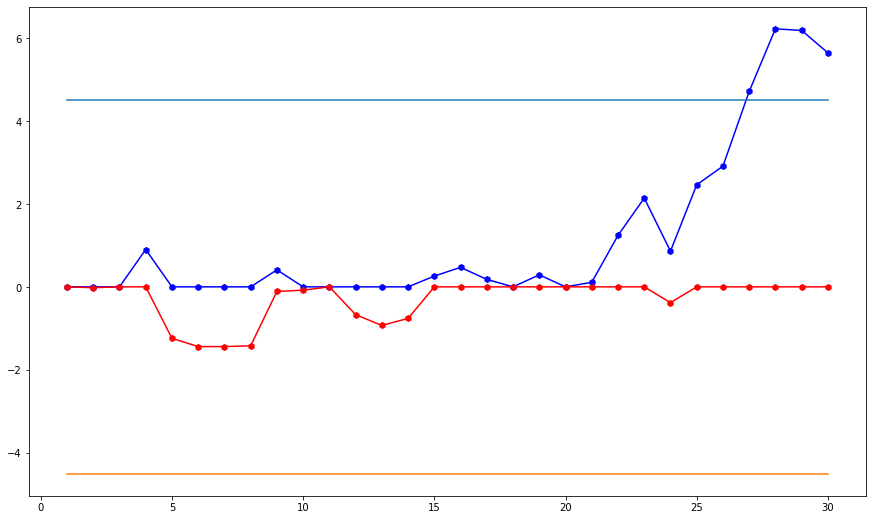

In [5]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(15,9))
H=[5*0.9]*30 #sigma=0.9 and h=5

plt.plot(data.i,data['ci+'], color='b', marker='h', markersize=6)
plt.plot(data.i,data['ci-'], color='r', marker='h', markersize=6)
plt.plot(data.i, [5*0.9]*30)
plt.plot(data.i, [-5*0.9]*30)
#plt.plot(data.i, np.array(5*0.9*-1)*30)
plt.show()

#### As it is clear from the CUSUM Control Chart, the process has a mean shift at 21st sample (between 20th and 21st sample).

In [ ]:
# part b and c are in excel.